In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Fdata = pd.read_csv('Features data set.csv')
Sdata = pd.read_csv('sales data-set.csv')
Stdata = pd.read_csv('stores data-set.csv')

<ipython-input-3-e46a70dc9b78>:7: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  Sdata = pd.read_csv('sales data-set.csv')


In [4]:
Fdata.nunique()

,0
Store,45
Date,182
Temperature,4178
Fuel_Price,1011
MarkDown1,4023
MarkDown2,2715
MarkDown3,2885
MarkDown4,3405
MarkDown5,4045
CPI,2505


In [5]:
Fdata.isnull().sum()

,0
Store,0
Date,0
Temperature,0
Fuel_Price,0
MarkDown1,4158
MarkDown2,5269
MarkDown3,4577
MarkDown4,4726
MarkDown5,4140
CPI,585


In [6]:
(Fdata.isnull().sum()/(len(Fdata)))*100

,0
Store,0.000000
Date,0.000000
Temperature,0.000000
Fuel_Price,0.000000
MarkDown1,50.769231
MarkDown2,64.334554
MarkDown3,55.885226
MarkDown4,57.704518
MarkDown5,50.549451
CPI,7.142857


In [7]:
!pip install seaborn

In [8]:
!pip install notebook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.0 MB/s eta 0:00:00


In [9]:
pip install -U ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.0/390.0 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 49.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=feeece7579a4c83202419e150743b85381a3f8ae83b32fa4fd46e725a90913f4
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [10]:
!pip install matplotlib

In [11]:
import sys
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport

ProfileReport(Fdata)

X = ProfileReport(Fdata)

X.to_file(output_file='EDA Report')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [12]:
# Check for duplicates in each dataset
features_duplicates = Fdata.duplicated().sum()
sales_duplicates = Sdata.duplicated().sum()
stores_duplicates = Stdata.duplicated().sum()

print(f"Duplicates in Features Dataset: {features_duplicates}")
print(f"Duplicates in Sales Dataset: {sales_duplicates}")
print(f"Duplicates in Stores Dataset: {stores_duplicates}")

# Remove duplicates if any are found
features_df = Fdata.drop_duplicates()
sales_df = Sdata.drop_duplicates()
stores_df = Stdata.drop_duplicates()

# Confirm no duplicates remain
features_duplicates_after = features_df.duplicated().sum()
sales_duplicates_after = sales_df.duplicated().sum()
stores_duplicates_after = stores_df.duplicated().sum()

print(f"Duplicates after removal in Features Dataset: {features_duplicates_after}")
print(f"Duplicates after removal in Sales Dataset: {sales_duplicates_after}")
print(f"Duplicates after removal in Stores Dataset: {stores_duplicates_after}")

Duplicates in Features Dataset: 0
Duplicates in Sales Dataset: 0
Duplicates in Stores Dataset: 0
Duplicates after removal in Features Dataset: 0
Duplicates after removal in Sales Dataset: 0
Duplicates after removal in Stores Dataset: 0


In [13]:
# Check for missing values in each dataset before handling
features_missing_before = Fdata.isnull().sum()
sales_missing_before = Sdata.isnull().sum()
stores_missing_before = Stdata.isnull().sum()

print("Missing values in Features Dataset before handling:")
print(features_missing_before)
print("\nMissing values in Sales Dataset before handling:")
print(sales_missing_before)
print("\nMissing values in Stores Dataset before handling:")
print(stores_missing_before)

Missing values in Features Dataset before handling:
Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

Missing values in Sales Dataset before handling:
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       1
dtype: int64

Missing values in Stores Dataset before handling:
Store    0
Type     0
Size     0
dtype: int64


In [14]:
# Fill missing markdown values with 0, assuming no markdown if NaN
Fdata[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = Fdata[
    ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
].fillna(0)

# Verify that missing values have been addressed
features_missing_after = Fdata.isnull().sum()
print(features_missing_after)

# Write the updated Fdata back to the existing CSV file
Fdata.to_csv('Features_data_set_New.csv', index=False)

print("The updated Fdata has been written back to 'Features_data_set.csv'")

Store             0
Date              0
Temperature       0
Fuel_Price        0
MarkDown1         0
MarkDown2         0
MarkDown3         0
MarkDown4         0
MarkDown5         0
CPI             585
Unemployment    585
IsHoliday         0
dtype: int64
The updated Fdata has been written back to 'Features_data_set.csv'


In [15]:
import pandas as pd
import numpy as np
from datetime import datetime

# Step 1: Create a Customer Dimension Table
np.random.seed(42)  # For reproducibility
num_customers = 500

customer_data = {
    'CustomerID': range(1, num_customers + 1),
    'Name': [f'Customer_{i}' for i in range(1, num_customers + 1)],
    'Age': np.random.randint(18, 65, num_customers),
    'Gender': np.random.choice(['Male', 'Female'], num_customers),
    'Location': np.random.choice(['London', 'Birmingham', 'Manchester', 'Leeds', 'Liverpool'], num_customers)
}

customer_df = pd.DataFrame(customer_data)

# Step 2: Generate Extended Dummy Daily Transactions Fact Table
num_days_extended = 365  # Covering approximately 1 year
start_date_extended = datetime(2023, 1, 1)  # Start from January 2023

# Create a list of all possible dates within the specified range
date_range = pd.date_range(start=start_date_extended, periods=num_days_extended)

extended_fact_data = []
store_list = [1, 2, 3, 4, 5]
product_list = ['Product_A', 'Product_B', 'Product_C', 'Product_D', 'Product_E']

# Generate random transactions
for _ in range(150000):  # 150,000 transactions
    customer_id = np.random.choice(customer_df['CustomerID'])
    store = np.random.choice(store_list)
    date = np.random.choice(date_range)  # Select a random date from the full date range

    product = np.random.choice(product_list)
    quantity = np.random.randint(1, 10)
    unit_price = round(np.random.uniform(5, 50), 2)
    total_amount = round(quantity * unit_price, 2)

    # Convert numpy.datetime64 to Python datetime and format it
    date_str = pd.Timestamp(date).strftime('%Y-%m-%d')

    extended_fact_data.append([
        f"TXN_{np.random.randint(100000, 999999)}",  # Random transaction ID
        customer_id, store, date_str,
        product, quantity, unit_price, total_amount
    ])

# Create the updated Fact Table DataFrame
extended_fact_df = pd.DataFrame(extended_fact_data, columns=[
    'TransactionID', 'CustomerID', 'Store', 'Date',
    'Product', 'Quantity', 'UnitPrice', 'TotalAmount'
])

# Convert 'Date' in the extended fact table to datetime format
extended_fact_df['Date'] = pd.to_datetime(extended_fact_df['Date'])

# Step 1: Create Month Cohorts
extended_fact_df['OrderMonth'] = extended_fact_df['Date'].dt.to_period('M')
extended_fact_df['CohortMonth'] = extended_fact_df.groupby('CustomerID')['OrderMonth'].transform('min')

# Step 2: Analyze Active Customers for Each Cohort
extended_cohort_data = extended_fact_df.groupby(['CohortMonth', 'OrderMonth']).agg(ActiveCustomers=('CustomerID', 'nunique')).reset_index()

# Create a pivot table to visualize retention rates
extended_cohort_pivot = extended_cohort_data.pivot(index='CohortMonth', columns='OrderMonth', values='ActiveCustomers')

# Step 3: Calculate Retention Rate
extended_cohort_size = extended_cohort_pivot.iloc[:, 0]  # First column: cohort size
extended_retention_rate = extended_cohort_pivot.divide(extended_cohort_size, axis=0)

# Display the extended retention rate table
print(extended_retention_rate.head())

OrderMonth   2023-01  2023-02  2023-03  2023-04  2023-05  2023-06  2023-07  \
CohortMonth                                                                  
2023-01          1.0      1.0      1.0      1.0      1.0      1.0      1.0   

OrderMonth   2023-08  2023-09  2023-10  2023-11  2023-12  
CohortMonth                                               
2023-01          1.0      1.0      1.0      1.0      1.0  


In [16]:
customer_df.to_csv('customer_data.csv', index=False)  # Set index=False to avoid saving the index

In [17]:
extended_fact_df.to_csv('extended_fact.csv', index=False)  # Set index=False to avoid saving the index

In [18]:
import pandas as pd

# Define the start and end dates
start_date = '2022-01-01'
end_date = '2025-12-31'

# Generate the date range
date_range = pd.date_range(start=start_date, end=end_date)

# Create a calendar DataFrame
calendar_df = pd.DataFrame(date_range, columns=['Date'])

# Add additional columns to the calendar table (optional)
calendar_df['Year'] = calendar_df['Date'].dt.year
calendar_df['Month'] = calendar_df['Date'].dt.month
calendar_df['Day'] = calendar_df['Date'].dt.day
calendar_df['Quarter'] = calendar_df['Date'].dt.quarter
calendar_df['Weekday'] = calendar_df['Date'].dt.day_name()

# Display the first few rows of the calendar table
print(calendar_df.head())

# Optionally save the calendar table to a CSV file
calendar_df.to_csv('calendar_table.csv', index=False)

        Date  Year  Month  Day  Quarter    Weekday
0 2022-01-01  2022      1    1        1   Saturday
1 2022-01-02  2022      1    2        1     Sunday
2 2022-01-03  2022      1    3        1     Monday
3 2022-01-04  2022      1    4        1    Tuesday
4 2022-01-05  2022      1    5        1  Wednesday


In [24]:
import pandas as pd

extended_fact_df['Date'] = pd.to_datetime(extended_fact_df['Date'])
extended_fact_df['month_year'] = extended_fact_df['Date'].dt.to_period('M')

In [25]:
month_cohort = extended_fact_df.groupby('month_year')['CustomerID'].nunique()
print(month_cohort)

month_year
2023-01    500
2023-02    500
2023-03    500
2023-04    500
2023-05    500
2023-06    500
2023-07    500
2023-08    500
2023-09    500
2023-10    500
2023-11    500
2023-12    500
Freq: M, Name: CustomerID, dtype: int64


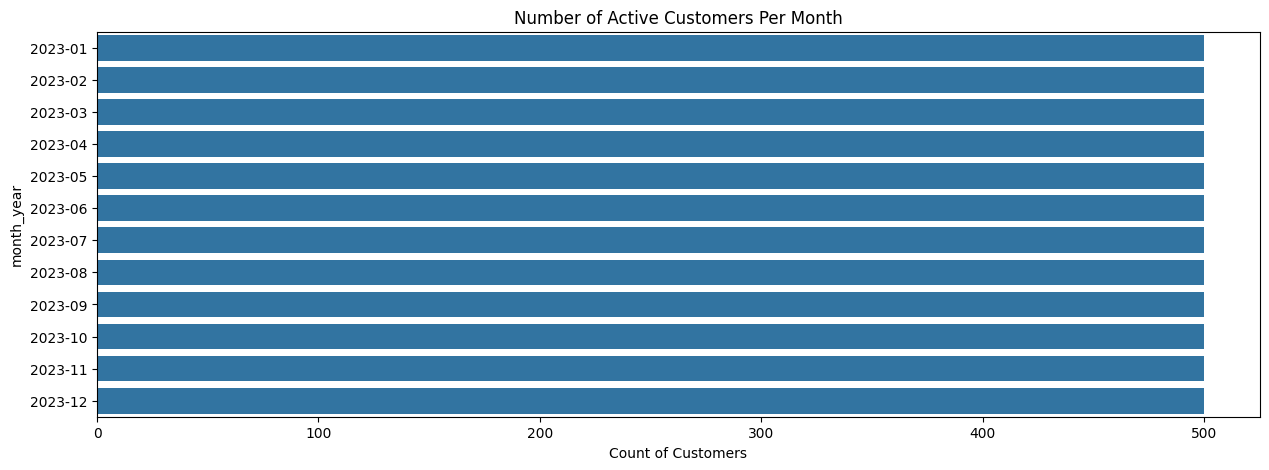

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.barplot(y=month_cohort.index.astype(str), x=month_cohort.values)
plt.xlabel('Count of Customers')
plt.title('Number of Active Customers Per Month')
plt.show()

In [27]:
retention_rate = round(month_cohort.pct_change(periods=1) * 100, 2)
print(retention_rate)

month_year
2023-01    NaN
2023-02    0.0
2023-03    0.0
2023-04    0.0
2023-05    0.0
2023-06    0.0
2023-07    0.0
2023-08    0.0
2023-09    0.0
2023-10    0.0
2023-11    0.0
2023-12    0.0
Freq: M, Name: CustomerID, dtype: float64


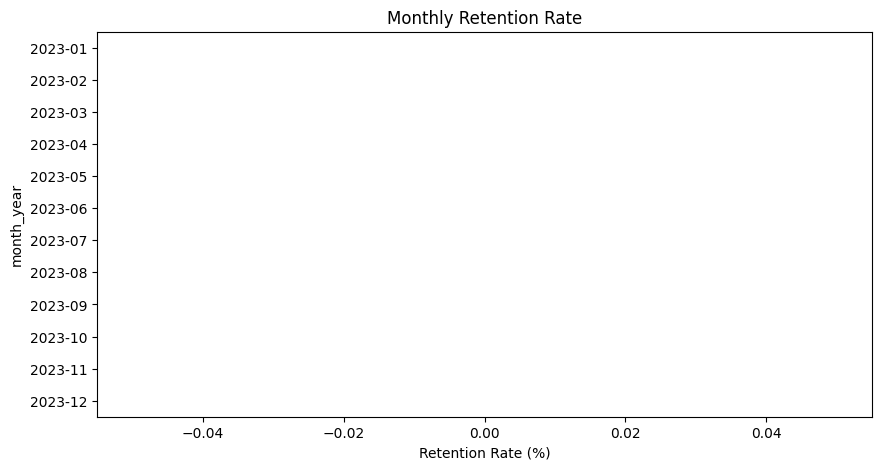

In [28]:
plt.figure(figsize=(10, 5))
sns.barplot(y=retention_rate.index.astype(str), x=retention_rate.values)
plt.xlabel('Retention Rate (%)')
plt.title('Monthly Retention Rate')
plt.show()

In [31]:
df_monetary = extended_fact_df.groupby('CustomerID')['TotalAmount'].sum().reset_index()
df_monetary.columns = ['CustomerID', 'Monetary']

In [32]:
df_frequency = extended_fact_df.groupby('CustomerID')['TransactionID'].nunique().reset_index()
df_frequency.columns = ['CustomerID', 'Frequency']

In [34]:
# Define a reference date (today's date or the max date in the data)
ref_day = extended_fact_df['Date'].max() + pd.Timedelta(days=1)

# Calculate days since last purchase
df_recency = extended_fact_df.groupby('CustomerID')['Date'].max().reset_index()
df_recency['Recency'] = (ref_day - df_recency['Date']).dt.days
df_recency = df_recency[['CustomerID', 'Recency']]

In [35]:
df_rfm = pd.merge(df_recency, df_frequency, on='CustomerID').merge(df_monetary, on='CustomerID')
print(df_rfm.head())

   CustomerID  Recency  Frequency  Monetary
0           1        3        310  42372.58
1           2        3        361  50447.99
2           3        2        325  40841.11
3           4        3        302  42793.31
4           5        1        285  40511.32


In [36]:
df_rfm['recency_labels'] = pd.cut(df_rfm['Recency'], bins=5, labels=['newest', 'newer', 'medium', 'older', 'oldest'])
df_rfm['frequency_labels'] = pd.cut(df_rfm['Frequency'], bins=5, labels=['lowest', 'lower', 'medium', 'higher', 'highest'])
df_rfm['monetary_labels'] = pd.cut(df_rfm['Monetary'], bins=5, labels=['smallest', 'smaller', 'medium', 'larger', 'largest'])

In [37]:
df_rfm['rfm_segment'] = df_rfm['recency_labels'].astype(str) + '-' + df_rfm['frequency_labels'].astype(str) + '-' + df_rfm['monetary_labels'].astype(str)

In [38]:
recency_dict = {'newest': 5, 'newer': 4, 'medium': 3, 'older': 2, 'oldest': 1}
frequency_dict = {'lowest': 1, 'lower': 2, 'medium': 3, 'higher': 4, 'highest': 5}
monetary_dict = {'smallest': 1, 'smaller': 2, 'medium': 3, 'larger': 4, 'largest': 5}

df_rfm['rfm_score'] = (
    df_rfm['recency_labels'].map(recency_dict).astype(int) +
    df_rfm['frequency_labels'].map(frequency_dict).astype(int) +
    df_rfm['monetary_labels'].map(monetary_dict).astype(int)
)

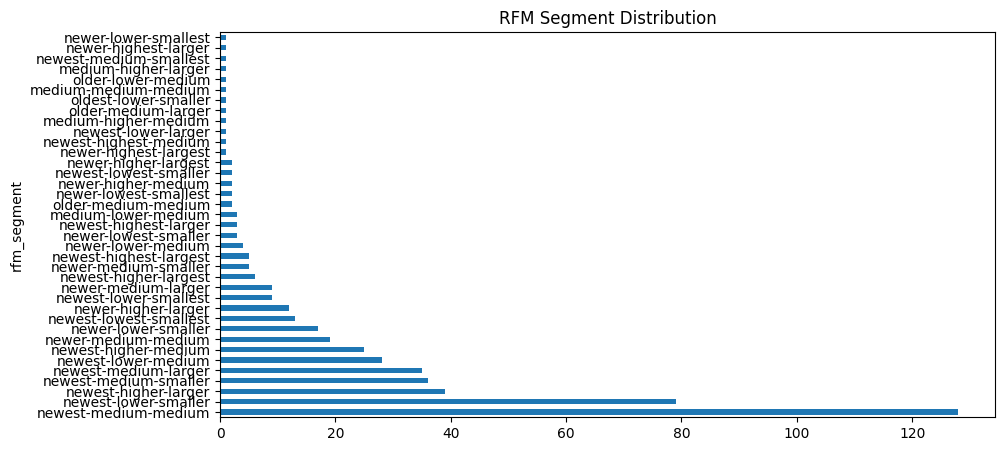

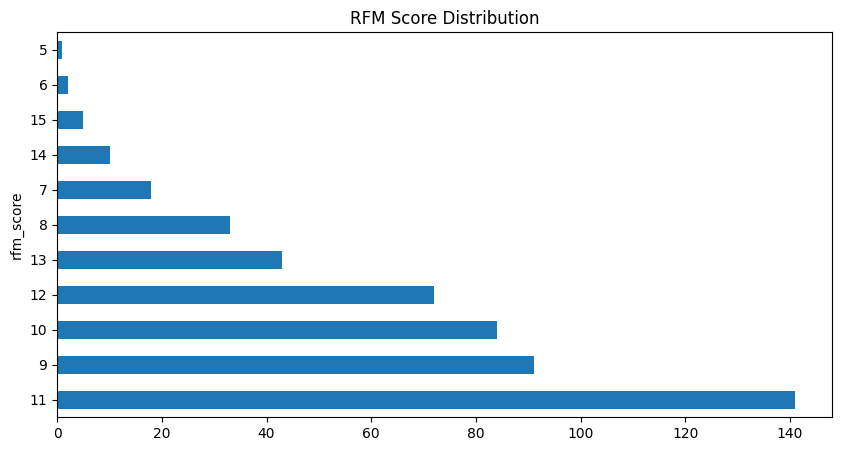

In [39]:
df_rfm['rfm_segment'].value_counts().plot(kind='barh', figsize=(10, 5), title="RFM Segment Distribution")
plt.show()

df_rfm['rfm_score'].value_counts().plot(kind='barh', figsize=(10, 5), title="RFM Score Distribution")
plt.show()